In [1]:
import pymks
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
import pandas as pd

### Changing the image from png/dat file to numpy array

In [6]:
image_path ='/Users/adithyaiyer/Desktop/time_001500.dat'
img_ = corr.dat_to_numpy(image_path)

## Visualizing the microstructure(cropped if png)

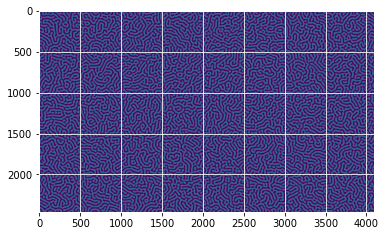

In [7]:
plt.imshow(img_)

## Binarize array

In [9]:
img_binary = corr.binarize_image_dat(img_)

In [35]:
img_binary = img_binary.astype(np.double)

In [36]:
type(img_binary[0][0])

numpy.float64

In [12]:
img_binary

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.]], dtype=float128)

In [14]:
img_binary.shape

(2458, 4096)

# Correlation plots obtained by using PYMKS library

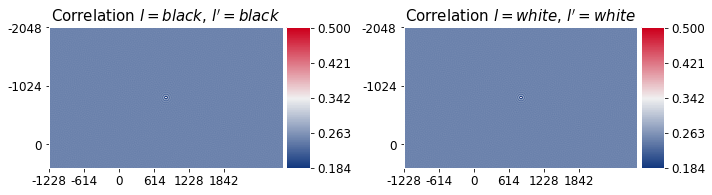

In [15]:
# Auto Correlation

auto_pymks =corr.auto_corr_from_pymks(img_binary)


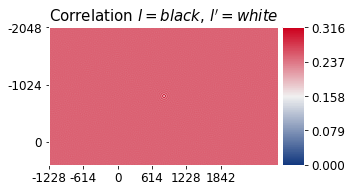

In [16]:
# Cross Correlation

cross_pymks =corr.cross_corr_from_pymks(img_binary)

# Plots obtained by self built CODE

white region : 


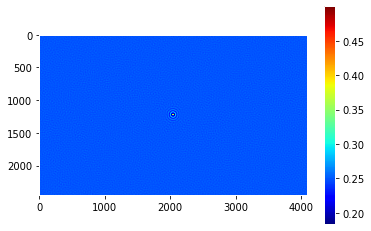

black region : 


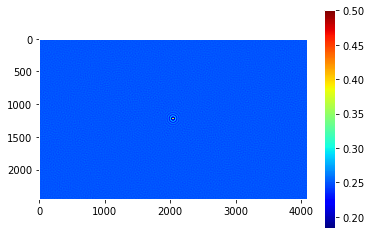

In [17]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_binary)

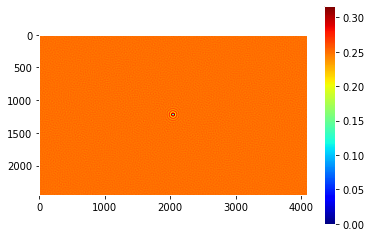

In [18]:
# Cross Correlations

cross = corr.cross_corr_from_code(img_binary)

In [19]:
np.min(cross.flatten())

5.594315114139762e-17

In [22]:
cross_flat = (cross[1229])
cross_pymks_flat = (cross_pymks[0][1229].flatten())

## Plotting 2 point stats accross all vectors

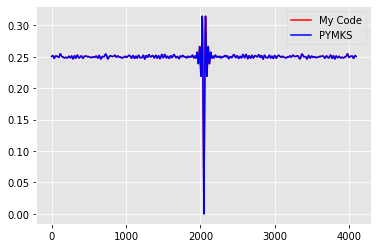

In [23]:
plt.plot(cross_pymks_flat,'r',cross_flat,'b')
plt.legend(['My Code','PYMKS'])


## Showing close up view to verify that there is no deviation

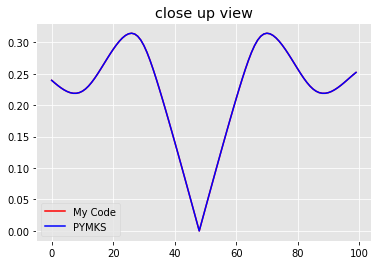

In [24]:
cross_flat = (cross[1229])[2000:2100]
cross_pymks_flat = (cross_pymks[0][1229].flatten())[2000:2100]
plt.plot(cross_pymks_flat,'r',cross_flat,'b')
plt.title("close up view")
plt.legend(['My Code','PYMKS'])


# Radial Destribution Probability

From outputs of my code


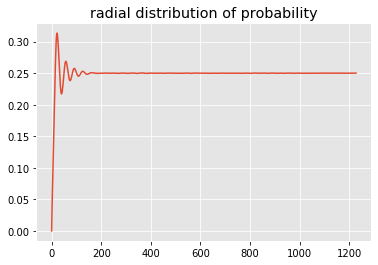

In [25]:
## From my code

r_val =corr.radialDistribution(cross)
reshaped_from_pymks = np.reshape(cross_pymks.flatten(),cross.shape)
print('From outputs of my code')

From outputs of PyMKS


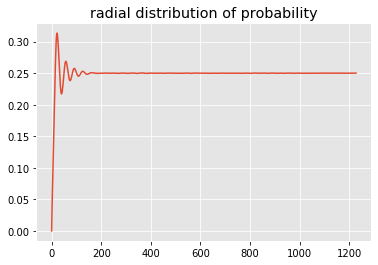

In [26]:
## From PYMKS

r_val_pymks = corr.radialDistribution(reshaped_from_pymks)
print('From outputs of PyMKS')

# Getting radially distributed prob between 2 angles

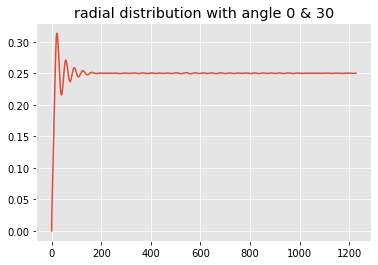

In [27]:
AngleChosenForOutput, radialProbDistribution =corr.giveAvailablePoints(cross,0,30,30)

Text(0.5, 1.0, 'Angles Chosen')

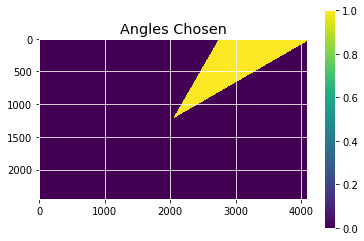

In [28]:
plt.imshow(AngleChosenForOutput)
plt.colorbar()
plt.title('Angles Chosen')

In [34]:
type(cross[23][34])

numpy.float64